In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd

In [33]:
import datetime

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [35]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [36]:
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [37]:
#conn = engine.connect()
#df = pd.read_sql(query, con=conn)
#conn.close()

In [47]:
query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= (
                        SELECT
                            date(MAX(date), '-365 day')
                        FROM
                            measurement
                    )
        ORDER BY
            date
        """

In [48]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

In [49]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


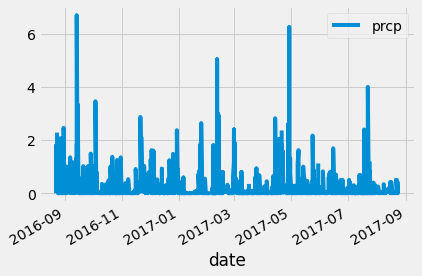

In [53]:
df.set_index("date").plot()

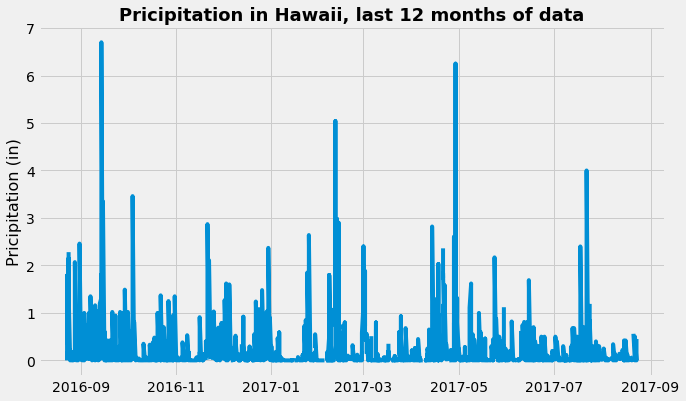

In [54]:
plt.figure(figsize=(10,6))
plt.plot(df.date, df.prcp)
plt.title("Pricipitation in Hawaii, last 12 months of data", fontweight="bold", fontsize=18)
plt.ylabel("Pricipitation (in)", fontsize=16)
plt.xlabel("")

plt.show()

In [55]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Stations

In [56]:
query2 = """
        SELECT
            count(*) as station_count
        FROM
            station
        """

In [58]:
conn = engine.connect()
df = pd.read_sql(query2, con=conn)
conn.close()

df

,station_count
0,9


In [61]:
query3 = """
        SELECT
            s.station,
            count(*) as tot_obs
        FROM
            station s
        JOIN measurement m on s.station = m.station
        GROUP BY s.station
        ORDER BY
            count(*) desc
        """

In [62]:
conn = engine.connect()
df = pd.read_sql(query3, con=conn)
conn.close()

df

,station,tot_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [70]:
query4 = """
        SELECT
            date,
            prcp,
            tobs,
            s.station,
            s.name
        FROM
            measurement m
            join station s on m.station = s.station
        WHERE
            date >= (
                        SELECT
                            date(MAX(date), '-365 day')
                        FROM
                            measurement
                    )
        ORDER BY
            date
        """

In [71]:
conn = engine.connect()
df = pd.read_sql(query4, con=conn)
conn.close()

df.head(10)

,date,prcp,tobs,station,name
0,2016-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US"
1,2016-08-23,0.15,76.0,USC00513117,"KANEOHE 838.1, HI US"
2,2016-08-23,0.05,80.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,2016-08-23,NaN,80.0,USC00517948,"PEARL CITY, HI US"
4,2016-08-23,0.02,80.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
5,2016-08-23,1.79,77.0,USC00519281,"WAIHEE 837.5, HI US"
6,2016-08-23,0.70,74.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
7,2016-08-24,0.08,79.0,USC00519397,"WAIKIKI 717.2, HI US"
8,2016-08-24,2.15,76.0,USC00513117,"KANEOHE 838.1, HI US"
9,2016-08-24,2.28,80.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"


In [72]:
df.groupby("station").size().sort_values(ascending=False)

station
USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
dtype: int64

In [76]:
mostActive = df.groupby("station").size().sort_values(ascending=False).index[0]
mostActive

'USC00519397'

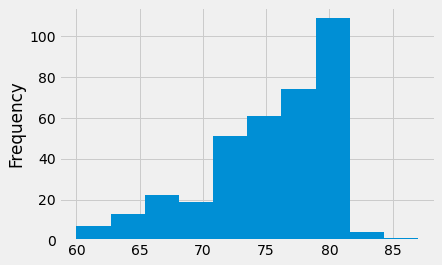

In [78]:
df.loc[df.station ==mostActive, "tobs"].reset_index(drop=True).plot(kind="hist")

In [83]:
df_sub = df.loc[df.station == mostActive].reset_index(drop=True)

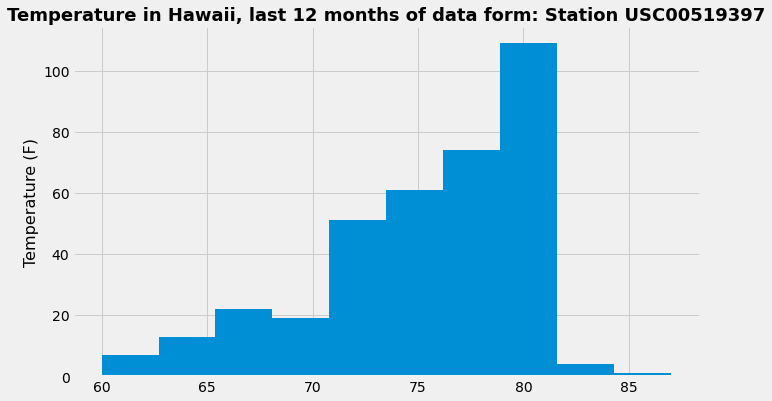

In [84]:
plt.figure(figsize=(10,6))
plt.hist(df_sub.tobs)
plt.title(f"Temperature in Hawaii, last 12 months of data form: Station {mostActive}", fontweight="bold", fontsize=18)
plt.ylabel("Temperature (F)", fontsize=16)
plt.xlabel("")

plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
